<a href="https://colab.research.google.com/github/KonstantinElfimow/k_nearest_neighbors/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X, y = make_classification(n_samples=110, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=6)
display(X, y)

array([[-1.71435607,  1.05793305],
       [ 1.22308043, -2.2635163 ],
       [-0.74339553, -0.82836749],
       [-3.10114999,  0.55737705],
       [-1.25272785, -1.99962916],
       [ 1.295549  , -0.90585939],
       [-0.39121512,  1.30843756],
       [-2.29436606, -0.32114685],
       [-0.37326143, -1.5106069 ],
       [ 0.84350362,  0.03804169],
       [-1.23337772,  0.62869299],
       [-0.51595847, -1.69033762],
       [ 0.11293492, -1.46417755],
       [ 0.39978471, -1.3120226 ],
       [-2.49684085, -0.0139064 ],
       [ 1.19899006,  1.27323302],
       [-1.84733371,  1.17918884],
       [-1.68009315,  0.94130391],
       [ 2.6400623 , -0.13810078],
       [-1.8453037 ,  0.96321745],
       [-0.71170663,  0.71554382],
       [-0.02934338, -1.59054511],
       [ 1.23158511,  1.36757795],
       [ 1.72196418, -0.7425116 ],
       [ 1.5719743 , -3.17595646],
       [ 0.14132289, -1.44743003],
       [ 1.80872881, -0.63583078],
       [ 1.79510491, -0.69260501],
       [ 0.07462334,

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((100, 2), (10, 2))

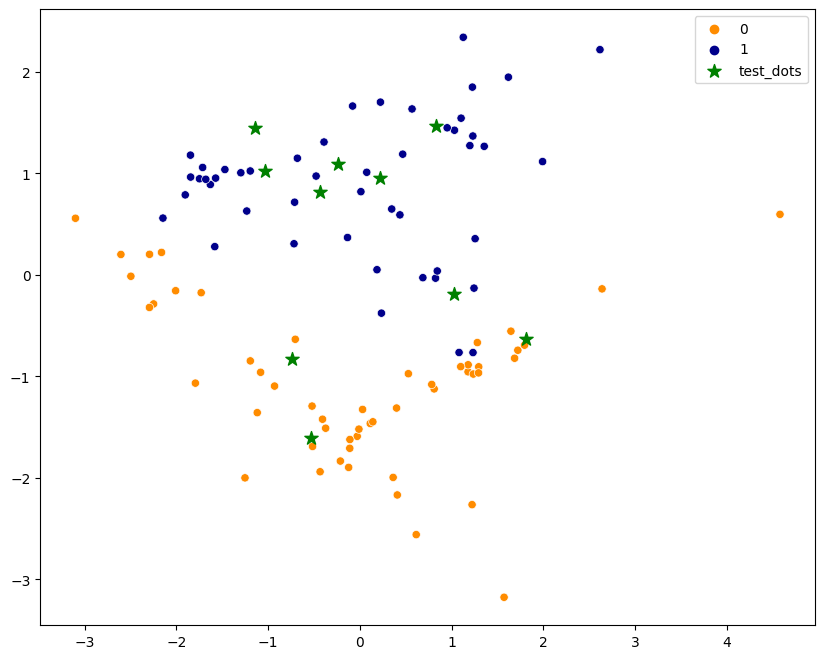

In [4]:
cmap_bold = ['darkorange', 'darkblue']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='*', s=100, label='test_dots')
plt.legend();

# Обучение KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
model = KNeighborsClassifier(n_neighbors=n_neighbors)

После инициализации модели обучаем её на обучающей выборке. При этом помним, что никакого обучения нет, модель просто сохраняет выборку.

In [6]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Предсказание KNN

In [7]:
pred_test = model.predict(X_test)
pred_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [8]:
display(pred_test, y_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

Предсказанные классы соответствуют действительности. Действительно, если мы глянем на картинку выше, то можем так же принять решения о принадлежности точек к одному из классов.

**Детали получения предсказания KNN**

Посмотрим на ближайших соседей для пары тестовых объектов.
Для этого:
1. Пройдёмся по всем обучающим объектам
2. Посчитаем Эвклидово расстояние (оно используется по умолчанию в KNN в sklearn) через numpy.linalg.norm

In [9]:
idx = 0
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):
  distances = distances.append({
      'train_idx': i,
      'dst': np.linalg.norm(train_dot - test_dot, ord=2)
  }, ignore_index=True)
distances['train_idx'] = distances['train_idx'].astype(int)

In [10]:
distances.sort_values('dst').head(n_neighbors)

,train_idx,dst
40,40,0.159445
41,41,0.262930
15,15,0.375908


Получим индексы для дальнейшей отрисовки.

In [11]:
nearest_neighbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neighbors_idxs

Int64Index([40, 41, 15], dtype='int64')

Отрисовываем три найденных соседа в полупрозрачные зеленые окужности. И видим, что все 3 объекта самые близкие для данного тестового объекта и они все синего цвета, а значит по большинству побеждает именно синий класс.

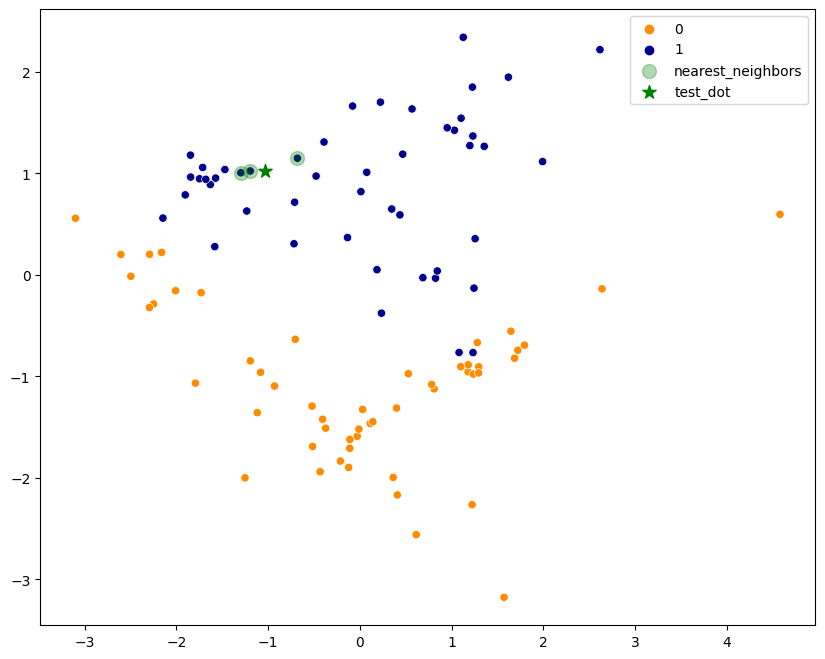

In [12]:
cmap_bold = ['darkorange', 'darkblue']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neighbors_idxs, 0],
            X_train[nearest_neighbors_idxs, 1],
            c='g',
            alpha=0.3,
            marker='o',
            s=100,
            label='nearest_neighbors')
plt.scatter(X_test[idx, 0],
            X_test[idx, 1],
            c='g',
            marker='*',
            s=100,
            label='test_dot')
plt.legend();

# Оценки плотности распределения случайной величины

In [ ]:
from sklearn.neighbors import KernelDensity

# Оценка плотности распределения для k=5
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_train)
density_estimates = kde.score_samples(X_test)

# Вывод оценок плотности распределения
print(density_estimates)

[-2.72244132 -2.78240096 -2.11559599 -2.08601104 -2.90876885 -2.8963272
 -4.63117141 -2.34540404 -3.04714287 -2.63818094]


Отрицательные значения означают, что вероятность попадания в данную точку меньше, чем вероятность попадания в среднюю точку набора данных. Это нормально для оценки плотности распределения, так как она не ограничена сверху и может принимать отрицательные значения.

# Как выбрать оптимального количество соседей

Нет чёткого алгоритма, как нужно действовать, чтобы найти самое лучшее количество соседей. Главное, не бросаться из крайности в крайность и смотреть на качество предсказания модели.

**Слишком мало соседей**

Если взять слишком мало соседей (N < 3), то на предсказание могут влиять выбросные объекты либо предсказания могут вообще оказаться случайными.

**Слишком много соседей**

Если взять слишком много соседей, то предсказание будет очень усреднённым, что может неправильно отнести тест к реальности. Представим, что у нас есть 2 класса, один из которых мало дисперсионный (кучное облачко), а второй - слишком дисперсионный (большое облачко), тогда если мы берём много соседей, а тестовая точка относится ко 2 классу, пусть и на его краю, то может произойти ситуация, когда больше соседей будет из 1 класса, потому что они сгруппированы ближе друг к другу. С этой проблемой помогает бороться модель взвешенного KNN, но сейчас не о ней.

## Мой вариант

Но так как в моём варианте сказано определить значение параметра k, при котором достигается минимум среднеквадратичной ошибки оценивания, то этим я сейчас и займусь. Однако стоит учитывать, что для каждой тестовой точки этот параметр может быть уникальный.

MSE:
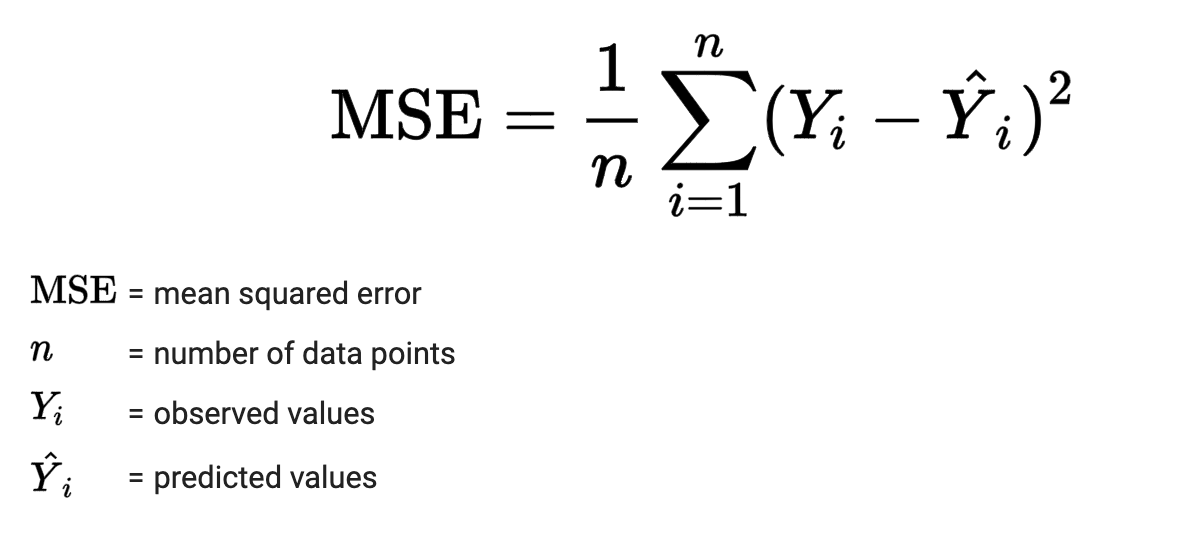

In [21]:
from tqdm import tqdm

# будем хранить индекс тестовой точки, оптимальный k, MSE при этом k
df = pd.DataFrame()
for idx, test_dot in tqdm(enumerate(X_test)):
  # сначала высчитываем расстояние до всех точек от тестовой тестовой
  # и сортируем от ближайших до самых дальних точек
  distances = pd.DataFrame()
  for i, train_dot in enumerate(X_train):
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)
    }, ignore_index=True)
  distances = distances.sort_values('dst')
  distances['train_idx'] = distances['train_idx'].astype(int)
  # к какому классу принадлежит каждая из удалённых точек
  distances['y_value'] = y[distances['train_idx']]

  # считаем минимальную среднеквадратичную ошибку
  min_mse = -1
  k = -1
  # из описанных трудностей выше следует, что min количество соседей = 3
  for neighbors in range(3, len(distances) + 1):
    sample = distances.iloc[:neighbors, :]
    mse = np.sum((sample['y_value'] - sample['y_value'].mean()) ** 2) / neighbors
    # зачем нам минимальное MSE, если при этом будет неправильное предсказание?
    # Нужно условие, которое проверяет правильность предсказания
    if y_test[idx] == int(round(sample['y_value'].mean(), 0))\
      and (mse < min_mse or min_mse < 0):
      min_mse = mse
      k = neighbors

  # записываем в датафрейм итоговое оптимальное k для тестовой точки, при к-м
  # достигается min значение MSE
  new_row = pd.DataFrame({
    'idx_test_dot': idx,
    'k_optimal': [k],
    'mse': [round(min_mse, 4)]
  })
  df = pd.concat([df, new_row], ignore_index=True)

10it [00:03,  2.88it/s]


In [22]:
df

,idx_test_dot,k_optimal,mse
0,0,3,0.0000
1,1,8,0.1094
2,2,4,0.1875
3,3,3,0.0000
4,4,21,0.2222
5,5,6,0.2222
6,6,3,0.0000
7,7,55,0.2460
8,8,18,0.2222
9,9,4,0.1875
